IMPORT FILES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

DATASET LOADING

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


EDA

/tmp/ipython-input-3774937778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette="Set2")


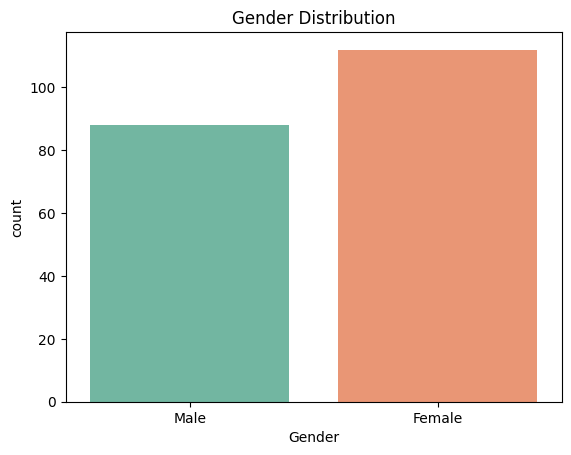

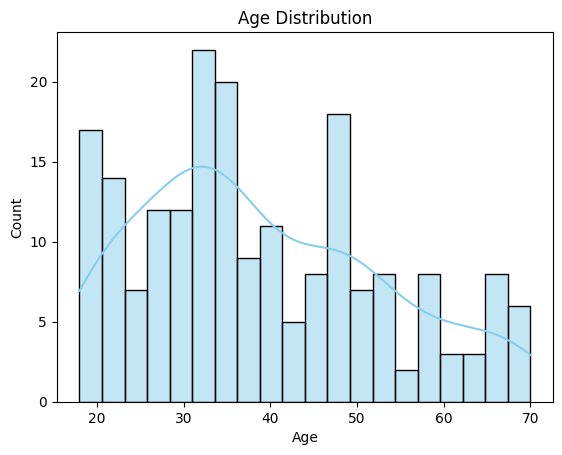

In [ ]:
sns.countplot(x='Gender', data=df, palette="Set2")
plt.title("Gender Distribution")
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()



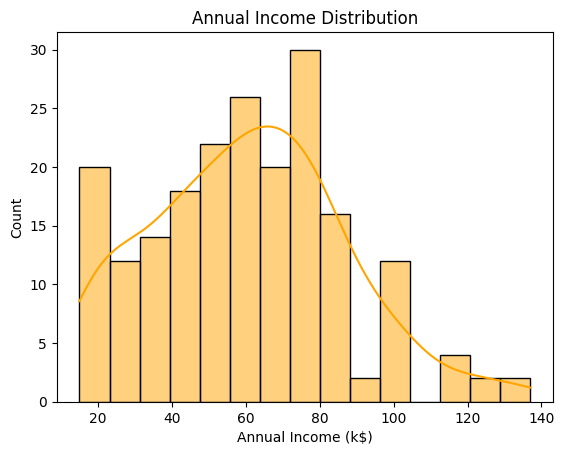

In [ ]:

# Income distribution
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='orange')
plt.title("Annual Income Distribution")
plt.show()

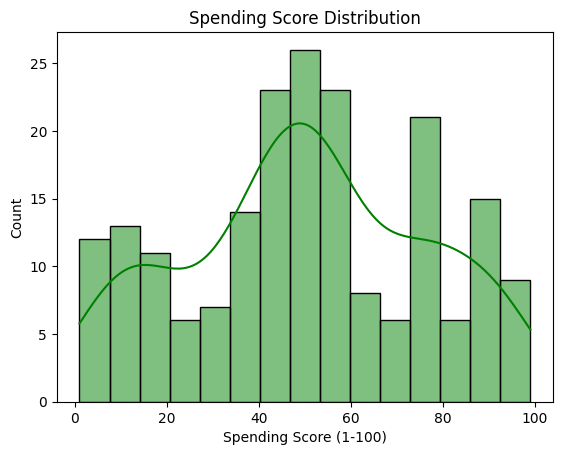

In [ ]:
# Spending score distribution
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='green')
plt.title("Spending Score Distribution")
plt.show()

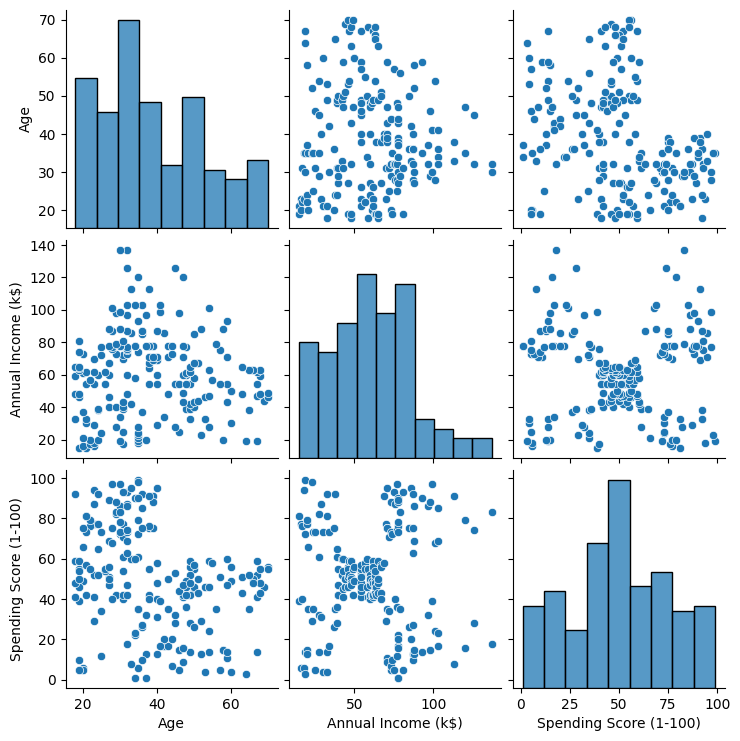

In [ ]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

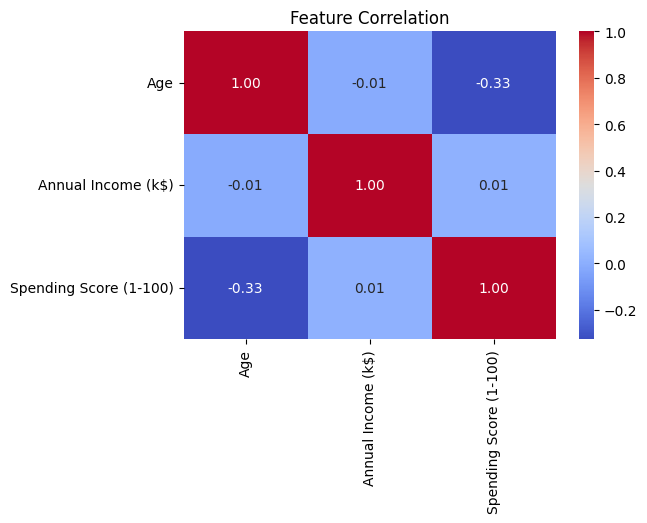

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation")
plt.show()

FEATURE SCALING

In [ ]:
df['Gender_encoded'] = df['Gender'].map({'Male':0, 'Female':1})

# Select features
features = ['Age','Annual Income (k$)','Spending Score (1-100)']
X = df[features]

# Standard Scaling (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Min-Max Scaling (values between 0 and 1)
mm_scaler = MinMaxScaler()
X_mm = mm_scaler.fit_transform(X)

print("Standard Scaled Sample:\n", X_scaled[:5])
print("\nMinMax Scaled Sample:\n", X_mm[:5])

Standard Scaled Sample:
 [[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]

MinMax Scaled Sample:
 [[0.01923077 0.         0.3877551 ]
 [0.05769231 0.         0.81632653]
 [0.03846154 0.00819672 0.05102041]
 [0.09615385 0.00819672 0.7755102 ]
 [0.25       0.01639344 0.39795918]]


K-MEANS CLUSTERING

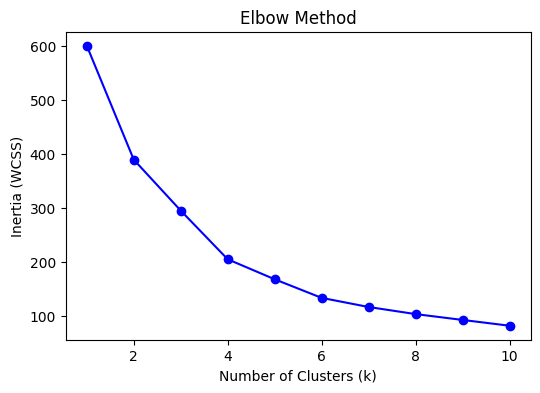

k=2, Silhouette Score=0.335
k=3, Silhouette Score=0.358
k=4, Silhouette Score=0.404
k=5, Silhouette Score=0.417
k=6, Silhouette Score=0.428


In [ ]:
inertia = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()

# Silhouette Scores
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={sil:.3f}")

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_cluster'] = kmeans.fit_predict(X_scaled)

# Cluster centers (rescaled to original units)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:\n", centers)

Cluster Centers:
 [[46.25       26.75       18.35      ]
 [25.18518519 41.09259259 62.24074074]
 [32.875      86.1        81.525     ]
 [39.87179487 86.1025641  19.35897436]
 [55.63829787 54.38297872 48.85106383]]


HIERARCHICAL CLUSTERING

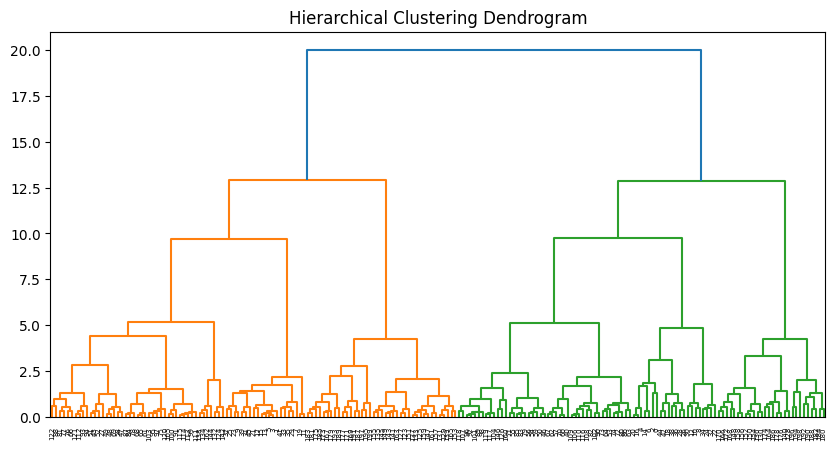

In [ ]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()



VISUALIZE CLUSTER AND BUSINESS INSIGHTS

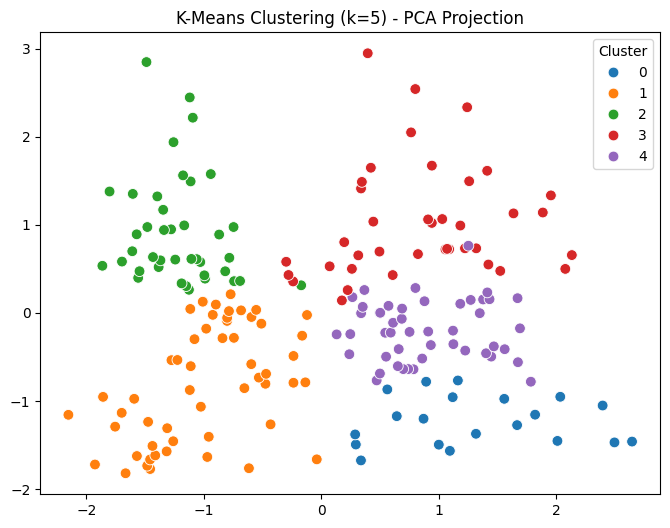

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                hue=df['KMeans_cluster'],
                palette='tab10', s=60)
plt.title("K-Means Clustering (k=5) - PCA Projection")
plt.legend(title="Cluster")
plt.show()

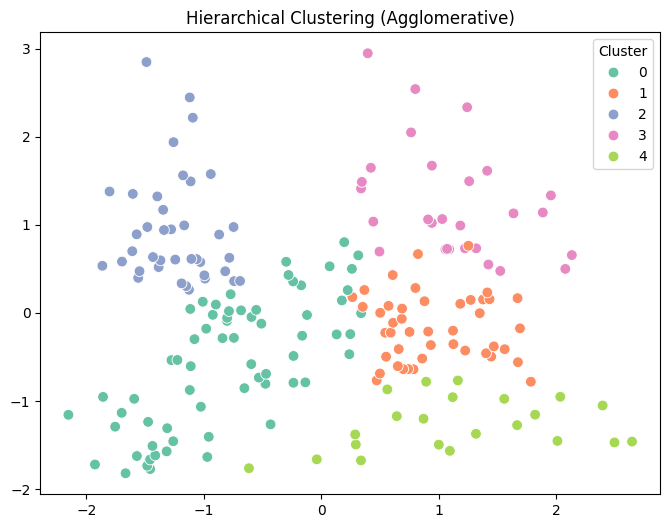

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                hue=df['Hier_cluster'],
                palette='Set2', s=60)
plt.title("Hierarchical Clustering (Agglomerative)")
plt.legend(title="Cluster")
plt.show()

In [ ]:
cluster_profile = df.groupby('KMeans_cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)
print(cluster_profile)

                 Age  Annual Income (k$)  Spending Score (1-100)
KMeans_cluster                                                  
0               46.2                26.8                    18.4
1               25.2                41.1                    62.2
2               32.9                86.1                    81.5
3               39.9                86.1                    19.4
4               55.6                54.4                    48.9
